# Лабораторная работа №8: Кластеризация

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Загрузка данных


In [233]:
df = pd.read_csv("27_B_17834.csv", header=0, sep=';')
print(df.dtypes) 

df['X'] = pd.to_numeric(df['X'].str.replace(',', '.'), errors='coerce')
df['Y'] = pd.to_numeric(df['Y'].str.replace(',', '.'), errors='coerce')
df.head()

# чтобы запихнуть в алгоритм
XY = np.column_stack((df['X'].values, df['Y'].values))
print("\n2D массив XY:\n", XY)
print("Форма массива:", XY.shape) 


X    object
Y    object
dtype: object

2D массив XY:
 [[ 7.084  7.959]
 [-0.759  5.781]
 [ 6.736  4.64 ]
 ...
 [-0.361  5.778]
 [ 7.805  6.691]
 [ 2.113  6.23 ]]
Форма массива: (9900, 2)


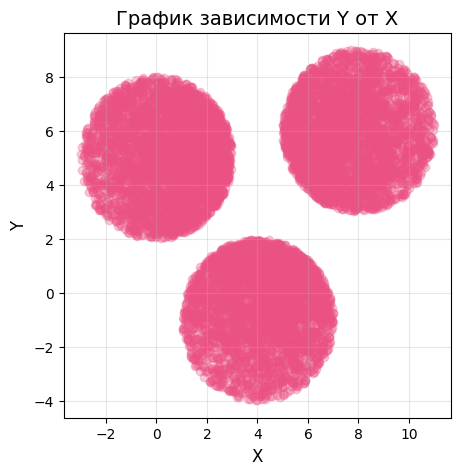

In [234]:
plt.figure(figsize=(5, 5))
plt.scatter(df['X'], df['Y'], alpha=0.3, color='#EB5284')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('График зависимости Y от X', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

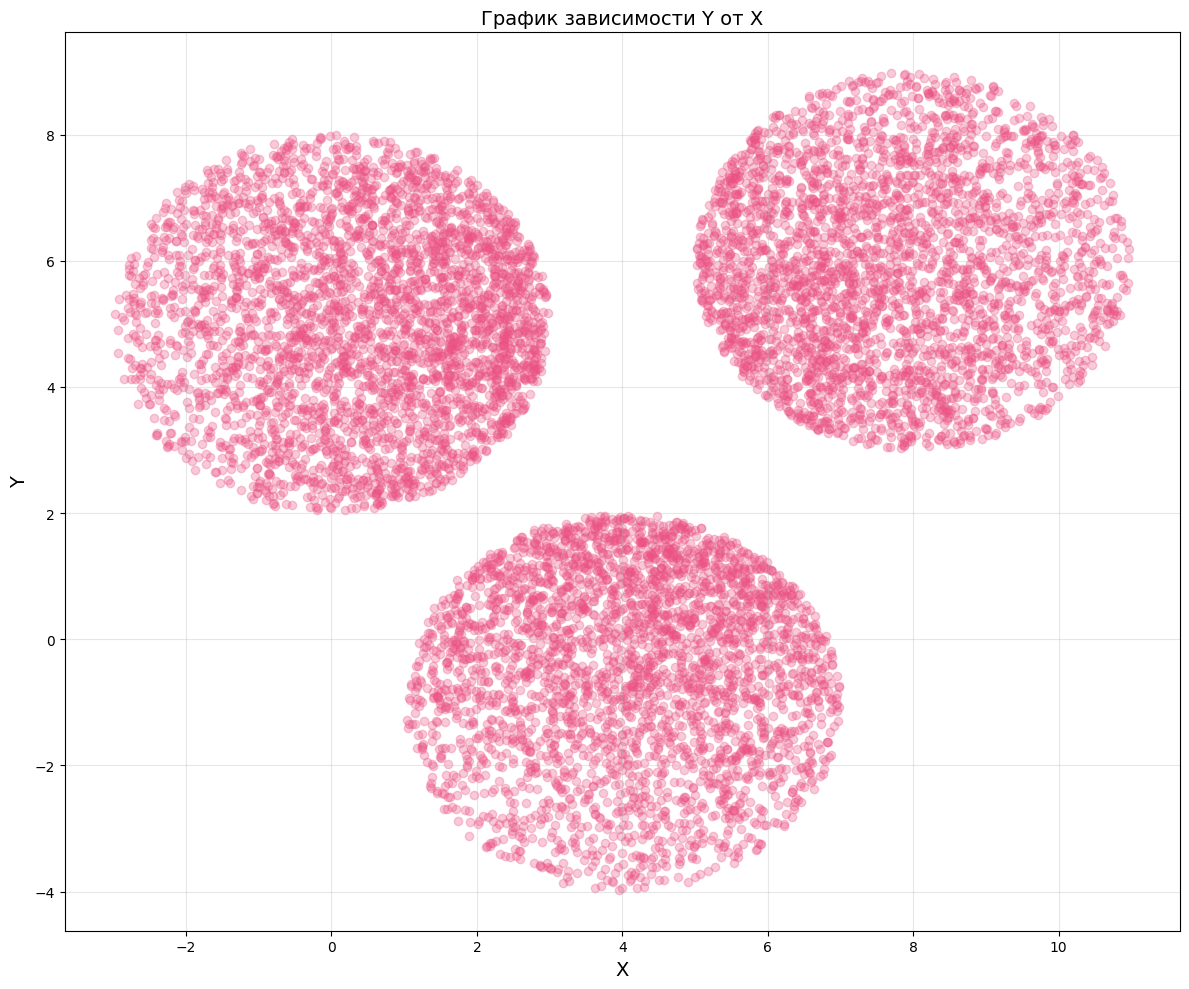

In [235]:
plt.figure(figsize=(12, 10))
plt.scatter(df['X'], df['Y'], alpha=0.3, color='#EB5284')
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('График зависимости Y от X', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2 Кластеризация с помощью k-means
Используем алгормит k-means с параметров количества кластеров = 3, т.к их отчетливо видно на графике.

In [236]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(XY)

labels = kmeans.labels_
arithmetic_centroids = kmeans.cluster_centers_ 

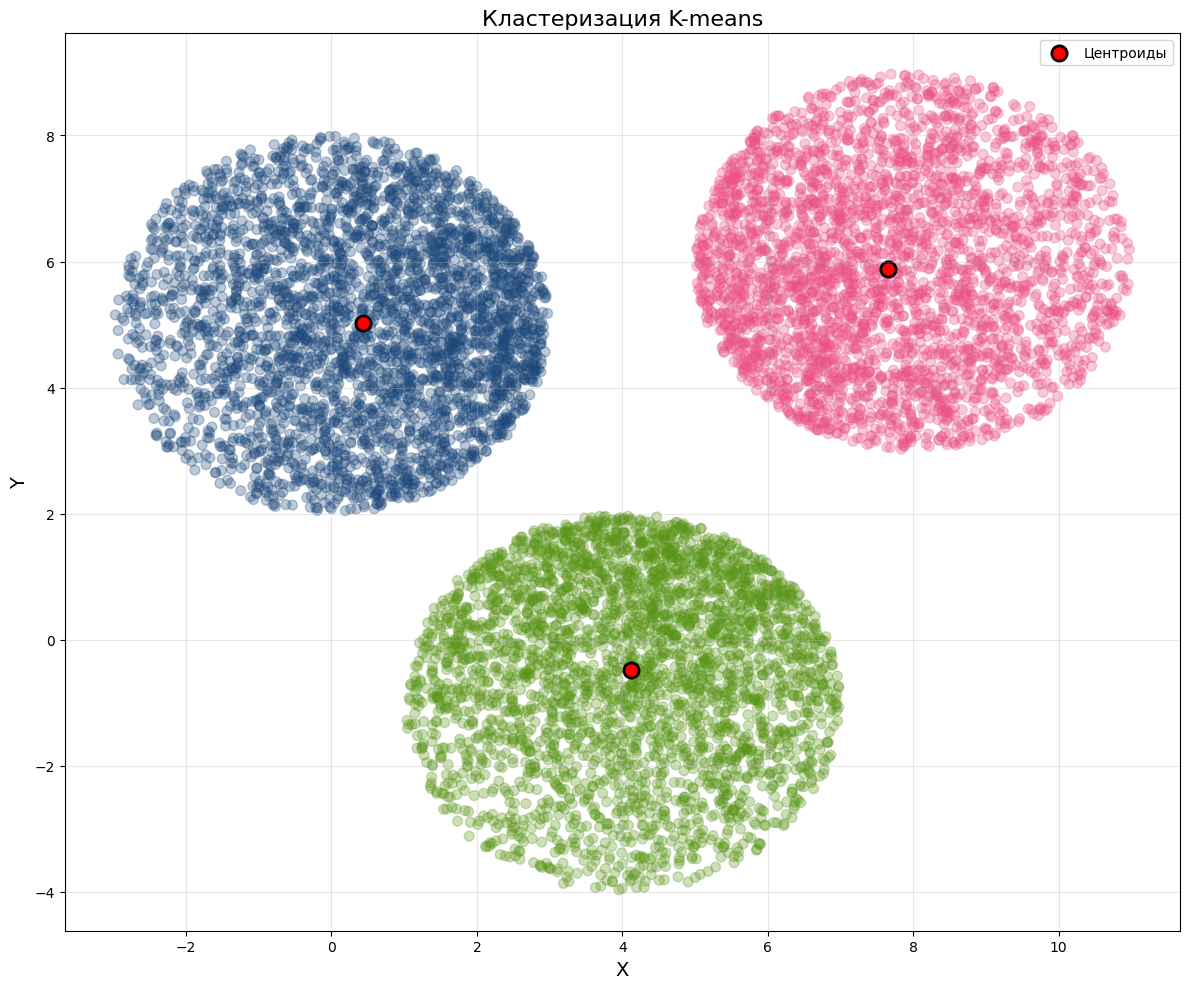

In [237]:

plt.figure(figsize=(12, 10))
        # розовый     зеленый    синий
colors = ["#EB5284", "#5A9518", "#1E497B"]

point_color = [colors[label] for label in labels]

scatter = plt.scatter(df['X'], df['Y'], 
                      c=point_color,
                      alpha=0.3, s=50)

plt.scatter(arithmetic_centroids[:, 0], arithmetic_centroids[:, 1],
            color='red', s=120,
            edgecolors='black', linewidth=2,
            label='Центроиды')

plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('Кластеризация K-means', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

### Алгоритм k-means вычисляет центроид как среднее арифметическое координат всех точек в кластере(в нашем случаем кругов), а нам нужно именно центроид, от которого сумма расстояний до всех остальных точек минимально, причем сам центроид это существующая точка из данных.

In [238]:

clusters = []
for i in range(3):
    cluster_points = XY[labels == i]
    clusters.append(cluster_points)
    print(f"\nКластер {i}: {len(cluster_points)} точек")

evclid_centroids = []
centroid_sums = []

for i, cluster in enumerate(clusters):
    print(f"\n--- Поиск центроида для кластера {i} ---")
    
    min_sum_distance = float('inf') 
    best_point = None
    best_index_in_cluster = -1
    
    for point in cluster:
        # Формулу евклидова расстояния: sqrt((x2-x1)² + (y2-y1)²)
        differences = cluster - point
        squared_differences = differences ** 2  
        sum_squared = squared_differences.sum(axis=1) 
        distances = np.sqrt(sum_squared)  
        
        sum_distance = np.sum(distances)
        
        if sum_distance < min_sum_distance:
            min_sum_distance = sum_distance
            best_point = point
    
    evclid_centroids.append(best_point)
    
    print(f"Найден центроид: ({best_point[0]}, {best_point[1]})")

evclid_centroids = np.array(evclid_centroids)


Кластер 0: 3200 точек

Кластер 1: 3200 точек

Кластер 2: 3500 точек

--- Поиск центроида для кластера 0 ---
Найден центроид: (7.563, 5.851)

--- Поиск центроида для кластера 1 ---
Найден центроид: (4.146, -0.294)

--- Поиск центроида для кластера 2 ---
Найден центроид: (0.549, 5.016)


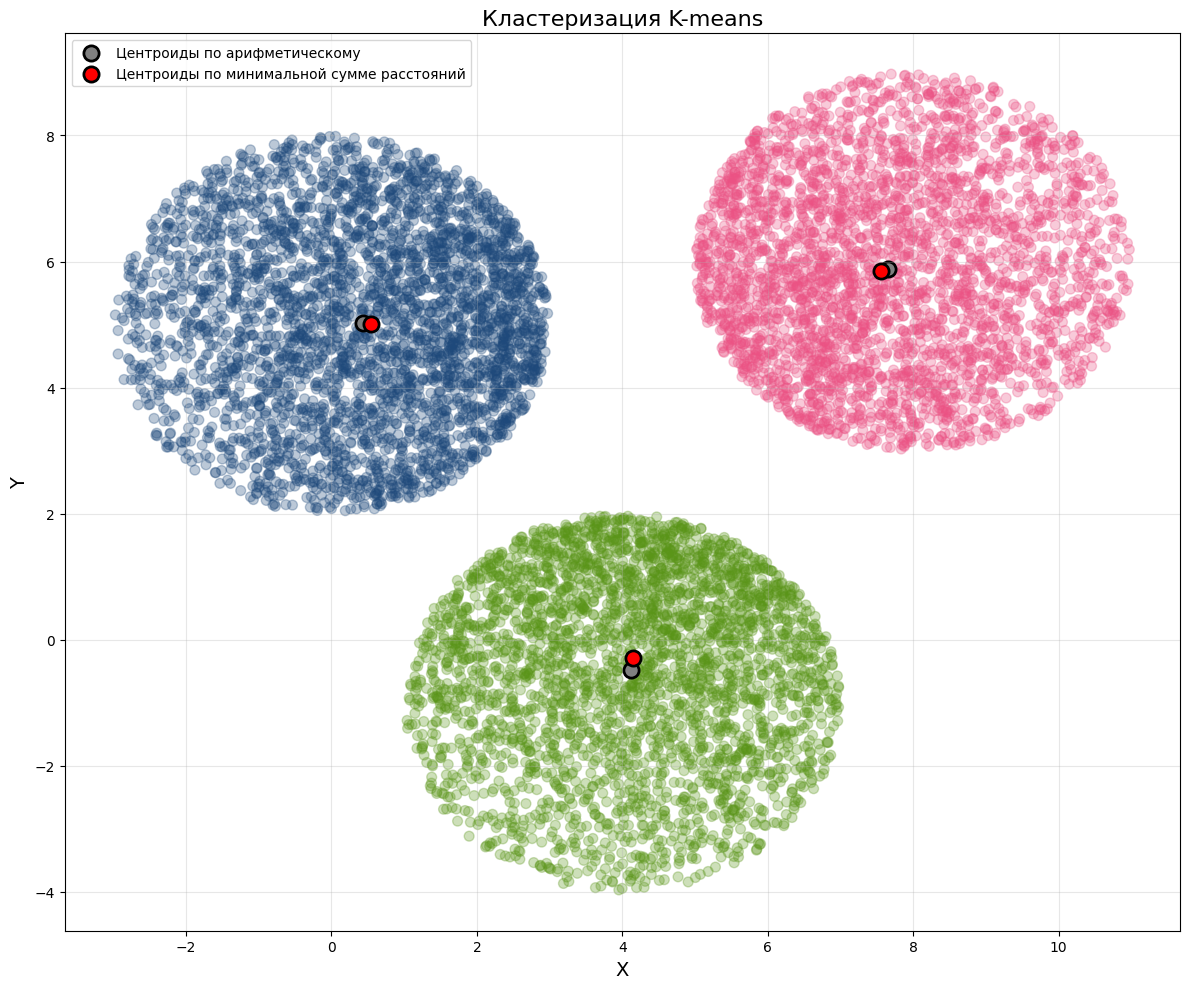

In [239]:

plt.figure(figsize=(12, 10))
        # розовый     зеленый    синий
colors = ["#EB5284", "#5A9518", "#1E497B"]

point_color = [colors[label] for label in labels]

scatter = plt.scatter(df['X'], df['Y'], 
                      c=point_color,
                      alpha=0.3, s=50)
                    
plt.scatter(arithmetic_centroids[:, 0], arithmetic_centroids[:, 1],
            color='gray', s=120,
            edgecolors='black', linewidth=2,
            label='Центроиды по арифметическому')

plt.scatter(evclid_centroids[:, 0], evclid_centroids[:, 1],
            color='red', s=120,
            edgecolors='black', linewidth=2,
            label='Центроиды по минимальной сумме расстояний')

plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('Кластеризация K-means', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Результат


In [240]:
print("Разница координат арифметического нахождения несуществующей точки и ")
print("существующей точки с минимальной суммой расстояний")
print(abs(arithmetic_centroids - evclid_centroids))
print("\nКоординаты существующих точек с минимальной суммой расстояний до других точек кластера")
print(evclid_centroids)

Разница координат арифметического нахождения несуществующей точки и 
существующей точки с минимальной суммой расстояний
[[0.09001656 0.02409594]
 [0.03364469 0.19100625]
 [0.11891314 0.00713257]]

Координаты существующих точек с минимальной суммой расстояний до других точек кластера
[[ 7.563  5.851]
 [ 4.146 -0.294]
 [ 0.549  5.016]]


# <center>Как работает k-means++<center/>

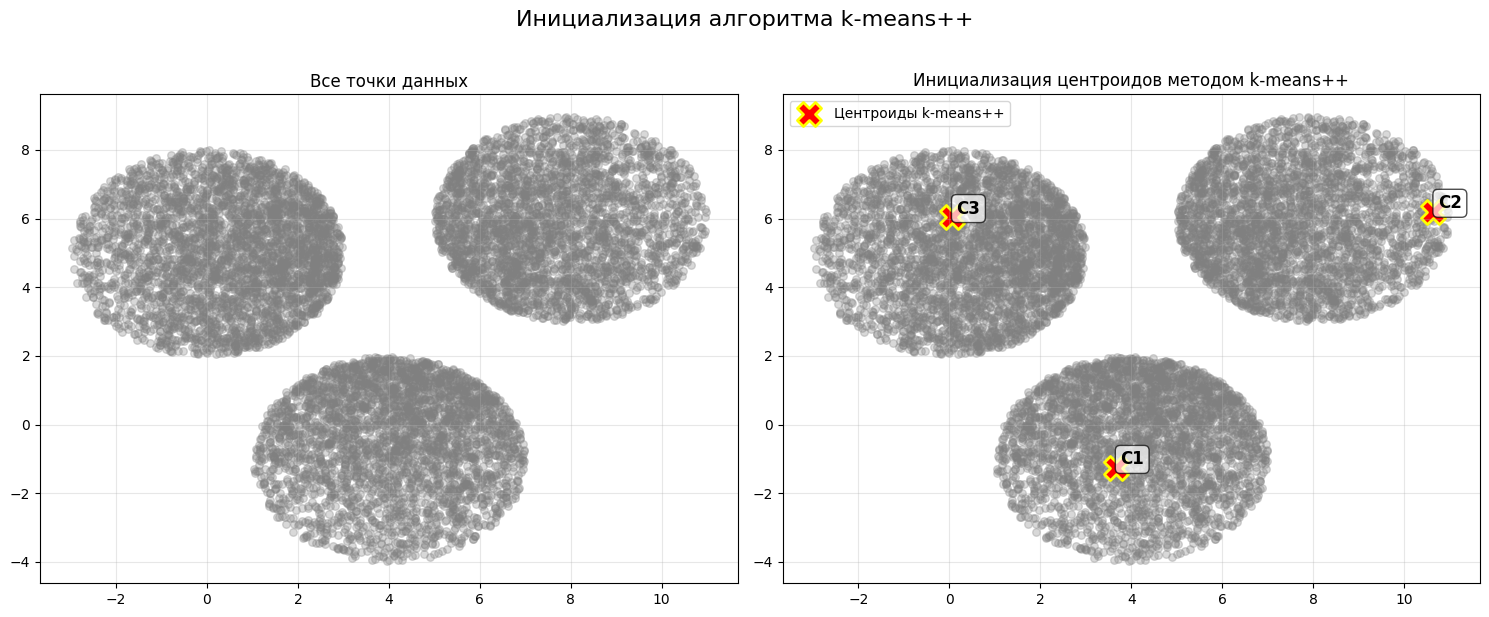

Начальные центроиды k-means++:
  Центроид 1: (3.658, -1.259)
  Центроид 2: (10.643, 6.202)
  Центроид 3: (0.055, 6.048)

ЗАПУСК ОСНОВНОГО АЛГОРИТМА K-MEANS
Итерация 1: inertia=76587.87, max_move=2.929085
Итерация 2: inertia=41310.64, max_move=0.134608
Итерация 3: inertia=41227.08, max_move=0.000000


C:\Users\xolead\AppData\Local\Temp\ipykernel_5680\563729417.py:242: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\xolead\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


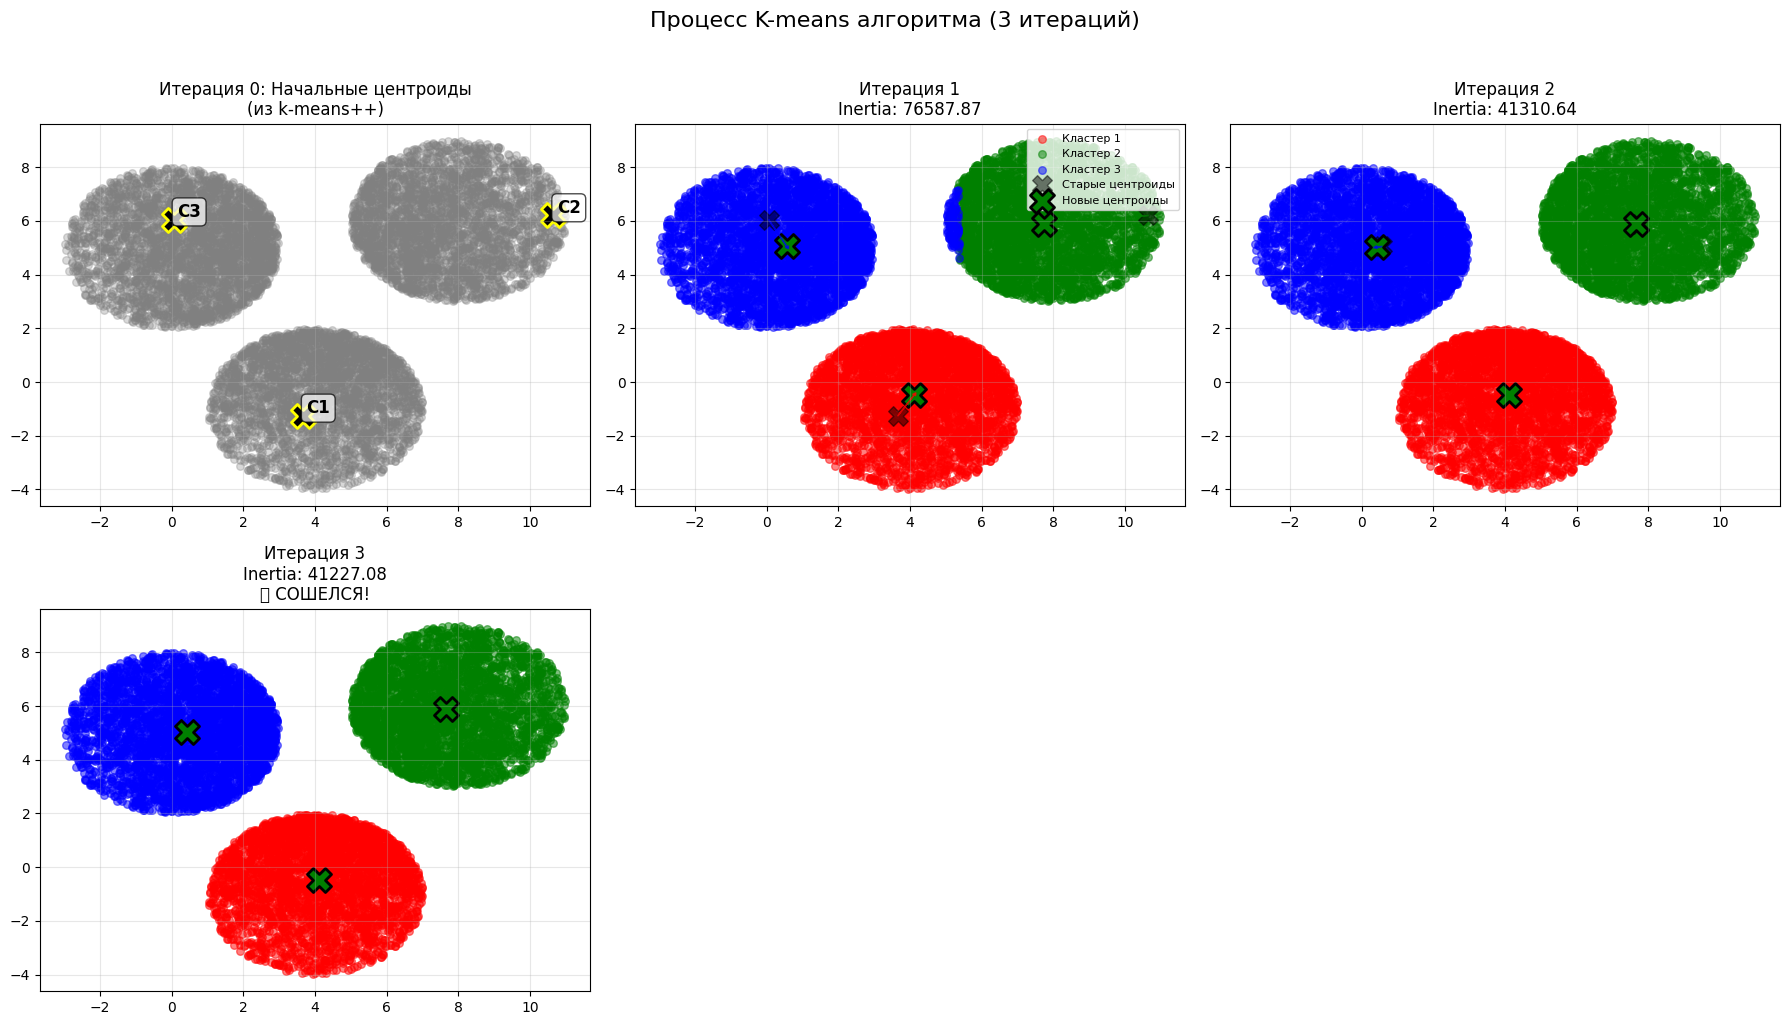


ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ K-MEANS

📊 Статистика кластеров:
  Кластер 1:
    • Точки: 3200
    • Радиус: 3.51
    • Среднее расстояние: 1.90
    • Стандартное отклонение: 0.73
  Кластер 2:
    • Точки: 3200
    • Радиус: 3.35
    • Среднее расстояние: 1.92
    • Стандартное отклонение: 0.73
  Кластер 3:
    • Точки: 3500
    • Радиус: 3.40
    • Среднее расстояние: 1.90
    • Стандартное отклонение: 0.72

📈 Inertia по итерациям:
  Итерация 1: 76587.87
  Итерация 2: 41310.64 (▼ 35277.23, -46.1%)
  Итерация 3: 41227.08 (▼ 83.56, -0.2%)

⚡ ИТОГ:
  Статус: СОШЕЛСЯ
  Всего итераций: 3
  Финальная inertia: 41227.08
  Общее улучшение: 35360.79 (46.2%)


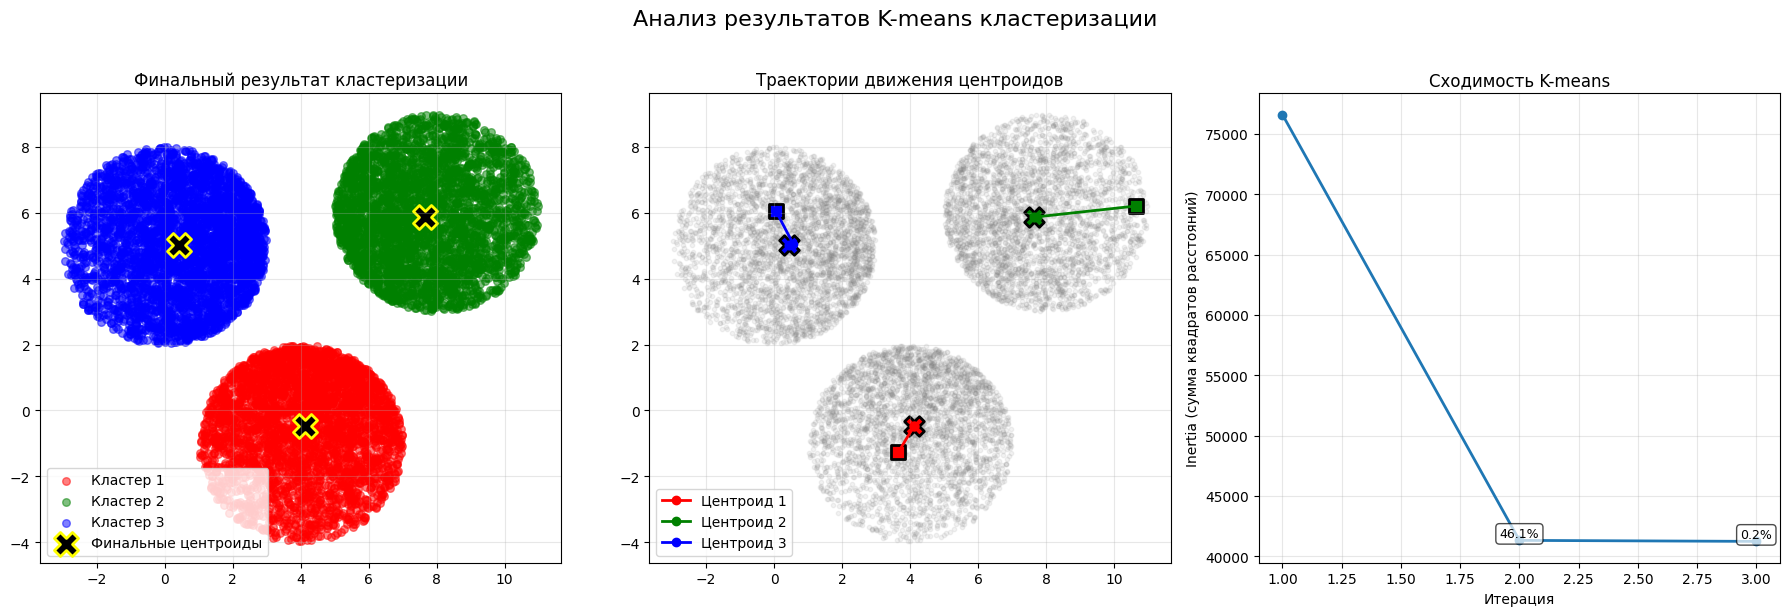


НАХОЖДЕНИЕ ИСТИННЫХ ЦЕНТРОИДОВ

Кластер 1:
  Стандартный центроид: (4.112, -0.485)
  Истинный центроид:    (4.146, -0.294)
  Сумма расстояний: 6060.896

Кластер 2:
  Стандартный центроид: (7.653, 5.875)
  Истинный центроид:    (7.563, 5.851)
  Сумма расстояний: 6132.633

Кластер 3:
  Стандартный центроид: (0.430, 5.023)
  Истинный центроид:    (0.549, 5.016)
  Сумма расстояний: 6656.163


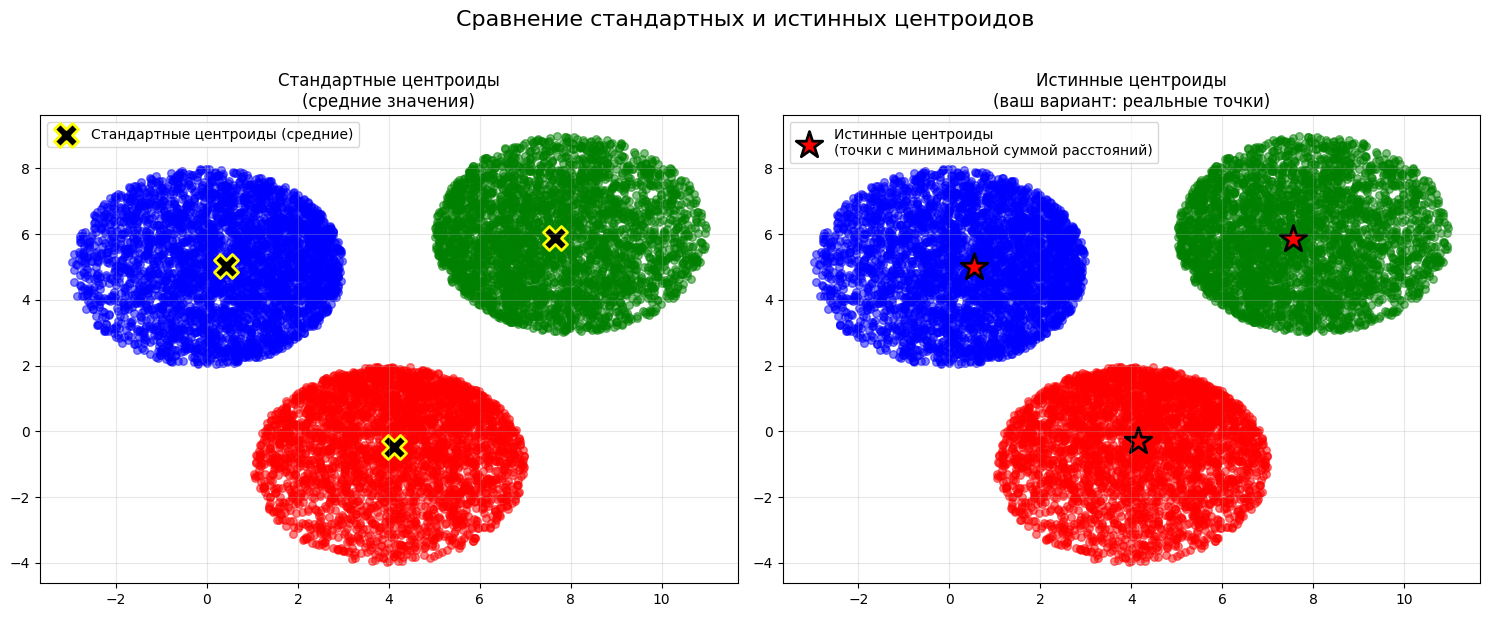

In [241]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

# ========== 1. ФУНКЦИЯ ДЛЯ k-means++ ИНИЦИАЛИЗАЦИИ ==========
def initialize_kmeans_plusplus(X, n_clusters=3):
    """Инициализация центроидов методом k-means++"""
    
    n_samples = X.shape[0]
    
    # 1. Выбираем первый центроид случайно
    np.random.seed(42)
    first_idx = np.random.choice(n_samples)
    centroids = [X[first_idx]]
    
    # 2. Выбираем остальные центроиды
    for _ in range(1, n_clusters):
        # Вычисляем расстояния от каждой точки до ближайшего центроида
        distances = []
        for i in range(n_samples):
            point = X[i]
            # Находим минимальное расстояние до уже выбранных центроидов
            min_dist = min([np.linalg.norm(point - c) for c in centroids])
            distances.append(min_dist)
        
        distances = np.array(distances)
        
        # Вероятность пропорциональна квадрату расстояния
        probabilities = distances ** 2
        probabilities /= probabilities.sum()
        
        # Выбираем следующий центроид
        next_idx = np.random.choice(n_samples, p=probabilities)
        centroids.append(X[next_idx])
    
    return np.array(centroids)

def visualize_kmeans_plusplus(XY, n_clusters=3):
    """Визуализация процесса инициализации k-means++"""
    
    centroids = initialize_kmeans_plusplus(XY, n_clusters)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # График 1: Все точки
    ax = axes[0]
    ax.scatter(XY[:, 0], XY[:, 1], alpha=0.3, color='gray', s=30)
    ax.set_title('Все точки данных')
    ax.grid(True, alpha=0.3)
    
    # График 2: Выбранные центроиды k-means++
    ax = axes[1]
    ax.scatter(XY[:, 0], XY[:, 1], alpha=0.3, color='gray', s=30)
    ax.scatter(centroids[:, 0], centroids[:, 1],
               color='red', s=300, marker='X',
               edgecolors='yellow', linewidth=2,
               label='Центроиды k-means++')
    
    # Нумеруем центроиды
    for i, centroid in enumerate(centroids):
        ax.text(centroid[0] + 0.1, centroid[1] + 0.1, 
               f'C{i+1}', fontsize=12, fontweight='bold',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    ax.set_title('Инициализация центроидов методом k-means++')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.suptitle('Инициализация алгоритма k-means++', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
    
    print(f"Начальные центроиды k-means++:")
    for i, c in enumerate(centroids):
        print(f"  Центроид {i+1}: ({c[0]:.3f}, {c[1]:.3f})")
    
    return centroids


# ========== 3. ЗАПУСКАЕМ k-means++ ИНИЦИАЛИЗАЦИЮ ==========
initial_centroids = visualize_kmeans_plusplus(XY, n_clusters=3)

# ========== 4. ОСНОВНАЯ ФУНКЦИЯ K-MEANS ==========
def run_kmeans_dynamic_visualization(XY, initial_centroids, max_iterations=10):
    """Версия с динамическим созданием графиков"""
    
    n_clusters = len(initial_centroids)
    n_samples = XY.shape[0]
    
    # Копируем начальные центроиды
    centroids = initial_centroids.copy()
    
    # История для анимации или анализа
    history = {
        'centroids': [centroids.copy()],
        'labels': [],
        'inertias': []
    }
    
    # Цвета для кластеров
    colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
    
    # Основной цикл K-means
    iteration = 0
    converged = False
    
    while iteration < max_iterations and not converged:
        # ========== ШАГ 1: Присвоение точек кластерам ==========
        # Вычисляем расстояния от каждой точки до всех центроидов
        distances = pairwise_distances(XY, centroids)
        
        # Находим ближайший центроид для каждой точки
        labels = np.argmin(distances, axis=1)
        
        # ========== ШАГ 2: Пересчет центроидов ==========
        new_centroids = centroids.copy()
        
        for k in range(n_clusters):
            # Точки, принадлежащие кластеру k
            mask = labels == k
            cluster_points = XY[mask]
            
            if len(cluster_points) > 0:
                # Новый центроид = среднее всех точек кластера
                new_centroids[k] = np.mean(cluster_points, axis=0)
        
        # ========== ВЫЧИСЛЕНИЕ МЕТРИК ==========
        inertia = 0
        for i in range(n_samples):
            assigned_centroid = centroids[labels[i]]
            inertia += np.sum((XY[i] - assigned_centroid) ** 2)
        
        # ========== ПРОВЕРКА СХОДИМОСТИ ==========
        moved_distance = np.linalg.norm(new_centroids - centroids, axis=1).max()
        converged = moved_distance < 1e-4
        
        # ========== СОХРАНЕНИЕ ИСТОРИИ ==========
        history['centroids'].append(new_centroids.copy())
        history['labels'].append(labels.copy())
        history['inertias'].append(inertia)
        
        # ========== ОБНОВЛЕНИЕ ЦЕНТРОИДОВ ==========
        centroids = new_centroids.copy()
        
        # Вывод информации о текущей итерации
        print(f"Итерация {iteration+1}: inertia={inertia:.2f}, max_move={moved_distance:.6f}")
        
        iteration += 1
    
    # После завершения цикла создаем визуализацию
    n_iterations_done = len(history['inertias'])
    
    # Создаем сетку графиков
    cols = 3
    rows = (n_iterations_done + 1) // cols + ((n_iterations_done + 1) % cols > 0)
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*5))
    
    if rows == 1 and cols == 1:
        axes = np.array([axes])
    elif rows == 1 or cols == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()
    
    # График 0: Начальные центроиды
    ax = axes[0]
    initial_centroids = history['centroids'][0]
    ax.scatter(XY[:, 0], XY[:, 1], alpha=0.3, color='gray', s=30)
    ax.scatter(initial_centroids[:, 0], initial_centroids[:, 1],
               color='black', s=300, marker='X',
               edgecolors='yellow', linewidth=2)
    
    for i, centroid in enumerate(initial_centroids):
        ax.text(centroid[0] + 0.1, centroid[1] + 0.1, 
               f'C{i+1}', fontsize=12, fontweight='bold',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    ax.set_title('Итерация 0: Начальные центроиды\n(из k-means++)')
    ax.grid(True, alpha=0.3)
    
    # Графики для каждой итерации
    for iter_num in range(n_iterations_done):
        if iter_num + 1 >= len(axes):
            break
            
        ax = axes[iter_num + 1]
        
        # Текущие метки и центроиды
        current_labels = history['labels'][iter_num]
        current_centroids = history['centroids'][iter_num]
        next_centroids = history['centroids'][iter_num + 1]
        
        # 1. Рисуем точки с цветами кластеров
        for k in range(n_clusters):
            mask = current_labels == k
            ax.scatter(XY[mask, 0], XY[mask, 1],
                      color=colors[k], alpha=0.5, s=30,
                      label=f'Кластер {k+1}')
        
        # 2. Рисуем СТАРЫЕ центроиды
        ax.scatter(current_centroids[:, 0], current_centroids[:, 1],
                  color='black', s=200, marker='X',
                  alpha=0.5, edgecolors='black', linewidth=1,
                  label='Старые центроиды')
        
        # 3. Рисуем НОВЫЕ центроиды
        ax.scatter(next_centroids[:, 0], next_centroids[:, 1],
                  color='green', s=300, marker='X',
                  edgecolors='black', linewidth=2,
                  label='Новые центроиды')
        
        # 4. Рисуем стрелки перемещения
        for k in range(n_clusters):
            if not np.allclose(current_centroids[k], next_centroids[k]):
                ax.arrow(current_centroids[k, 0], current_centroids[k, 1],
                        next_centroids[k, 0] - current_centroids[k, 0],
                        next_centroids[k, 1] - current_centroids[k, 1],
                        head_width=0.1, head_length=0.1,
                        fc=colors[k], ec=colors[k], alpha=0.7)
        
        # 5. Добавляем информацию
        inertia_val = history['inertias'][iter_num]
        title = f'Итерация {iter_num + 1}\n'
        title += f'Inertia: {inertia_val:.2f}'
        
        if iter_num == n_iterations_done - 1 and converged:
            title += '\n✅ СОШЕЛСЯ!'
        
        ax.set_title(title)
        if iter_num == 0:
            ax.legend(loc='upper right', fontsize=8)
        ax.grid(True, alpha=0.3)
    
    # Скрываем неиспользованные графики
    for i in range(n_iterations_done + 1, len(axes)):
        axes[i].axis('off')
    
    plt.suptitle(f'Процесс K-means алгоритма ({n_iterations_done} итераций)', 
                fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Финальные результаты
    final_labels = history['labels'][-1]
    final_centroids = history['centroids'][-1]
    
    # Анализ результатов
    print_results_analysis(XY, final_labels, final_centroids, history, converged)
    
    return final_labels, final_centroids, history

def print_results_analysis(XY, labels, centroids, history, converged):
    """Вывод анализа результатов"""
    
    print("\n" + "="*60)
    print("ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ K-MEANS")
    print("="*60)
    
    n_clusters = len(centroids)
    
    # 1. Статистика по кластерам
    print(f"\n📊 Статистика кластеров:")
    for k in range(n_clusters):
        mask = labels == k
        n_points = np.sum(mask)
        if n_points > 0:
            cluster_points = XY[mask]
            distances = np.linalg.norm(cluster_points - centroids[k], axis=1)
            radius = np.max(distances)
            avg_distance = np.mean(distances)
            std_distance = np.std(distances)
        else:
            radius = 0
            avg_distance = 0
            std_distance = 0
            
        print(f"  Кластер {k+1}:")
        print(f"    • Точки: {n_points}")
        print(f"    • Радиус: {radius:.2f}")
        print(f"    • Среднее расстояние: {avg_distance:.2f}")
        print(f"    • Стандартное отклонение: {std_distance:.2f}")
    
    # 2. Inertia по итерациям
    print(f"\n📈 Inertia по итерациям:")
    for i, inertia_val in enumerate(history['inertias']):
        if i == 0:
            print(f"  Итерация {i+1}: {inertia_val:.2f}")
        else:
            improvement = history['inertias'][i-1] - inertia_val
            improvement_pct = (improvement / history['inertias'][i-1]) * 100
            print(f"  Итерация {i+1}: {inertia_val:.2f} "
                  f"(▼ {improvement:.2f}, -{improvement_pct:.1f}%)")
    
    # 3. Итоговая информация
    print(f"\n⚡ ИТОГ:")
    print(f"  Статус: {'СОШЕЛСЯ' if converged else 'ДОСТИГНУТ ЛИМИТ ИТЕРАЦИЙ'}")
    print(f"  Всего итераций: {len(history['inertias'])}")
    print(f"  Финальная inertia: {history['inertias'][-1]:.2f}")
    
    if len(history['inertias']) > 1:
        total_improvement = history['inertias'][0] - history['inertias'][-1]
        improvement_pct = (total_improvement / history['inertias'][0]) * 100
        print(f"  Общее улучшение: {total_improvement:.2f} ({improvement_pct:.1f}%)")

def visualize_final_result(XY, labels, centroids, history):
    """Финальная визуализация результатов"""
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # График 1: Финальные кластеры
    ax = axes[0]
    colors = ['red', 'green', 'blue']
    
    for k in range(len(centroids)):
        mask = labels == k
        ax.scatter(XY[mask, 0], XY[mask, 1],
                  color=colors[k], alpha=0.5, s=30,
                  label=f'Кластер {k+1}')
    
    # Рисуем центроиды
    ax.scatter(centroids[:, 0], centroids[:, 1],
              color='black', s=300, marker='X',
              edgecolors='yellow', linewidth=2,
              label='Финальные центроиды')
    
    ax.set_title('Финальный результат кластеризации')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # График 2: Траектории центроидов
    ax = axes[1]
    
    # Рисуем все точки серым
    ax.scatter(XY[:, 0], XY[:, 1], alpha=0.1, color='gray', s=10)
    
    # Рисуем траектории каждого центроида
    for k in range(len(centroids)):
        # Собираем все позиции центроида k
        k_positions = []
        for centroids_in_iter in history['centroids']:
            k_positions.append(centroids_in_iter[k])
        k_positions = np.array(k_positions)
        
        # Линия траектории
        ax.plot(k_positions[:, 0], k_positions[:, 1],
               color=colors[k], linewidth=2, marker='o',
               markersize=6, label=f'Центроид {k+1}')
        
        # Начальная позиция
        ax.scatter(k_positions[0, 0], k_positions[0, 1],
                  color=colors[k], s=100, marker='s',
                  edgecolors='black', linewidth=2)
        
        # Финальная позиция
        ax.scatter(k_positions[-1, 0], k_positions[-1, 1],
                  color=colors[k], s=200, marker='X',
                  edgecolors='black', linewidth=2)
    
    ax.set_title('Траектории движения центроидов')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # График 3: График сходимости (Inertia)
    ax = axes[2]
    iterations = list(range(1, len(history['inertias']) + 1))
    
    ax.plot(iterations, history['inertias'], marker='o', linewidth=2)
    ax.set_xlabel('Итерация')
    ax.set_ylabel('Inertia (сумма квадратов расстояний)')
    ax.set_title('Сходимость K-means')
    ax.grid(True, alpha=0.3)
    
    # Добавляем проценты улучшения
    for i, inertia_val in enumerate(history['inertias']):
        if i > 0:
            improvement = (history['inertias'][i-1] - inertia_val) / history['inertias'][i-1] * 100
            ax.text(i+1, inertia_val, f'{improvement:.1f}%', 
                   fontsize=9, ha='center', va='bottom',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    plt.suptitle('Анализ результатов K-means кластеризации', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# ========== 5. ЗАПУСК ВСЕГО АЛГОРИТМА ==========
print("\n" + "="*60)
print("ЗАПУСК ОСНОВНОГО АЛГОРИТМА K-MEANS")
print("="*60)

final_labels, final_centroids, history = run_kmeans_dynamic_visualization(
    XY, initial_centroids, max_iterations=10
)

# ========== 6. ФИНАЛЬНАЯ ВИЗУАЛИЗАЦИЯ ==========
visualize_final_result(XY, final_labels, final_centroids, history)

# ========== 7. НАХОЖДЕНИЕ ИСТИННЫХ ЦЕНТРОИДОВ (ВАШ ВАРИАНТ) ==========
print("\n" + "="*60)
print("НАХОЖДЕНИЕ ИСТИННЫХ ЦЕНТРОИДОВ")
print("="*60)

true_centroids = []
centroid_sums = []

for k in range(len(final_centroids)):
    # Берем точки из финального кластера
    mask = final_labels == k
    cluster_points = XY[mask]
    
    min_sum_distance = float('inf')
    best_point = None
    
    # Перебираем все точки в кластере
    for point in cluster_points:
        # Вычисляем расстояния от point до всех других точек
        distances = np.sqrt(((cluster_points - point) ** 2).sum(axis=1))
        sum_distance = np.sum(distances)
        
        if sum_distance < min_sum_distance:
            min_sum_distance = sum_distance
            best_point = point
    
    true_centroids.append(best_point)
    centroid_sums.append(min_sum_distance)
    
    print(f"\nКластер {k+1}:")
    print(f"  Стандартный центроид: ({final_centroids[k][0]:.3f}, {final_centroids[k][1]:.3f})")
    print(f"  Истинный центроид:    ({best_point[0]:.3f}, {best_point[1]:.3f})")
    print(f"  Сумма расстояний: {min_sum_distance:.3f}")

true_centroids = np.array(true_centroids)

# ========== 8. ВИЗУАЛИЗАЦИЯ СРАВНЕНИЯ ==========
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# График 1: Стандартные центроиды
ax = axes[0]
colors = ['red', 'green', 'blue']

for k in range(len(final_centroids)):
    mask = final_labels == k
    ax.scatter(XY[mask, 0], XY[mask, 1],
              color=colors[k], alpha=0.5, s=30)

# Стандартные центроиды
ax.scatter(final_centroids[:, 0], final_centroids[:, 1],
          color='black', s=300, marker='X',
          edgecolors='yellow', linewidth=2,
          label='Стандартные центроиды (средние)')

ax.set_title('Стандартные центроиды\n(средние значения)')
ax.legend()
ax.grid(True, alpha=0.3)

# График 2: Истинные центроиды
ax = axes[1]

for k in range(len(final_centroids)):
    mask = final_labels == k
    ax.scatter(XY[mask, 0], XY[mask, 1],
              color=colors[k], alpha=0.5, s=30)

# Истинные центроиды
ax.scatter(true_centroids[:, 0], true_centroids[:, 1],
          color='red', s=400, marker='*',
          edgecolors='black', linewidth=2,
          label='Истинные центроиды\n(точки с минимальной суммой расстояний)')

ax.set_title('Истинные центроиды\n(ваш вариант: реальные точки)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.suptitle('Сравнение стандартных и истинных центроидов', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()